In [2]:
%matplotlib inline

import pandas as pd # Panel data processing
import numpy as np # Library for numerical data
import matplotlib.pyplot as plt # Plots
import matplotlib 

In [3]:
flights = pd.read_csv('flights.csv') 
# https://s3.amazonaws.com/vandyhacks/datascience/flights/flights.csv
# Load the csv from our s3 bucket
# This might take a while since the file is about 500mb big (in future just download onto computer)

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1])) 
flights.head()

C:\Users\kenny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dimensions: 5819079 rows, 31 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
airlines = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/airlines.csv')
airlines.head() 

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


# 3. Remove Columns with Empty Values

In [5]:
flights = flights.dropna(axis=1, thresh= 0.8 * flights.shape[0]) # Drop any columns containing NaN, but keep columns with at least 80% non-NA values

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))
flights.head()

Dimensions: 5819079 rows, 25 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


# 4. Add 'DATE' and 'TOTAL_DELAY' Columns

In [6]:
flights['DATE'] = pd.to_datetime(flights[['MONTH', 'DAY','YEAR']]) # We use a special case of to_datetime(): assemble the datetime by inferring from a DataFrame subset

flights['TOTAL_DELAY'] = flights['DEPARTURE_DELAY'].astype(float) + flights['ARRIVAL_DELAY'].astype(float) # Get total delay of flights

avg_delay_date = pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per day

avg_delay_date.sort_values(by='TOTAL_DELAY', ascending=False).head(10) # Show dates with highest average total delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
DATE,,,
2015-01-04,31.567859,31.975011,63.481589
2015-12-27,31.054942,28.204632,58.977168
2015-12-29,32.300155,26.297732,58.419655
2015-12-30,30.444736,26.174419,56.601697
2015-12-28,29.024812,24.505093,53.324382
2015-03-01,25.702983,25.896026,51.100200
2015-01-03,25.168419,25.461860,50.557076
2015-08-20,25.715046,24.012981,49.653439
2015-07-18,23.864630,21.889349,45.746877


In [7]:
avg_delay_airline = pd.DataFrame(flights.groupby('AIRLINE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per airline
avg_delay_airline.sort_values(by=['TOTAL_DELAY'], ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
AIRLINE,,,
NK,15.944766,14.471800,30.354900
F9,13.350858,12.504706,25.808059
UA,14.435441,5.431594,19.764650
B6,11.514353,6.677861,18.120328
MQ,10.125188,6.457873,16.425060
EV,8.715934,6.585379,15.200976
WN,10.581986,4.374964,14.892147
VX,9.022595,4.737706,13.731191
OO,7.801104,5.845652,13.581735


(array([2.099756e+06, 2.178202e+06, 8.304700e+05, 3.526040e+05,
        2.168350e+05, 2.945700e+04, 3.630000e+03, 1.872000e+03,
        8.120000e+02, 3.700000e+02]),
 array([  7. ,  75.3, 143.6, 211.9, 280.2, 348.5, 416.8, 485.1, 553.4,
        621.7, 690. ]),
 <a list of 10 Patch objects>)

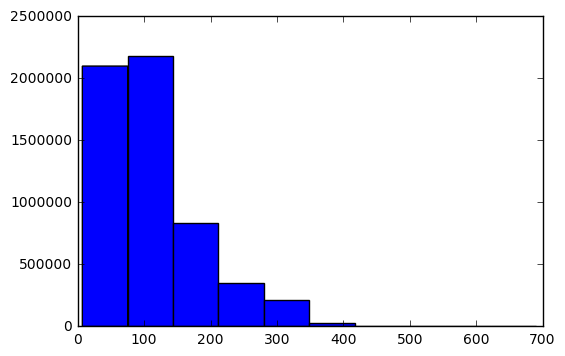

In [5]:
plt.hist(flights['AIR_TIME'].dropna())

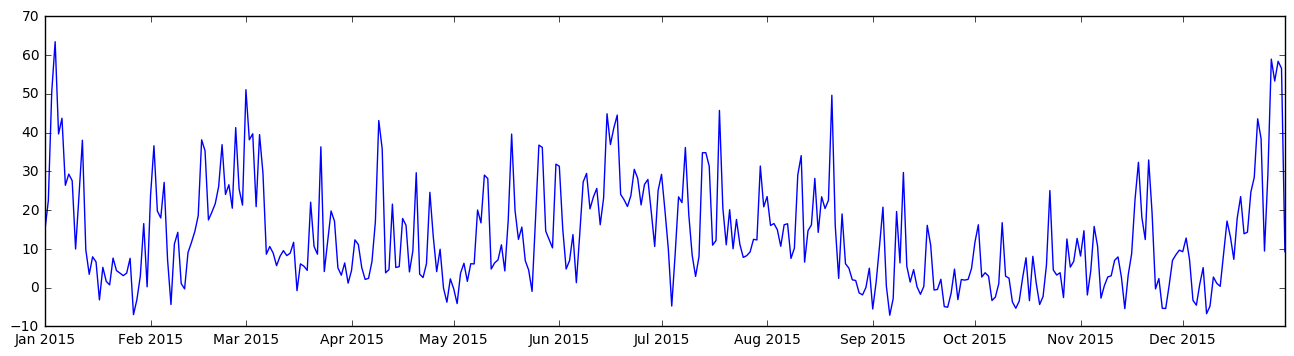

In [6]:
plt.figure(figsize=(16,4)) # Specifies figure size (optional line)
plt.plot(avg_delay_date.index, avg_delay_date['TOTAL_DELAY']) # Plotting by total_delay over dates

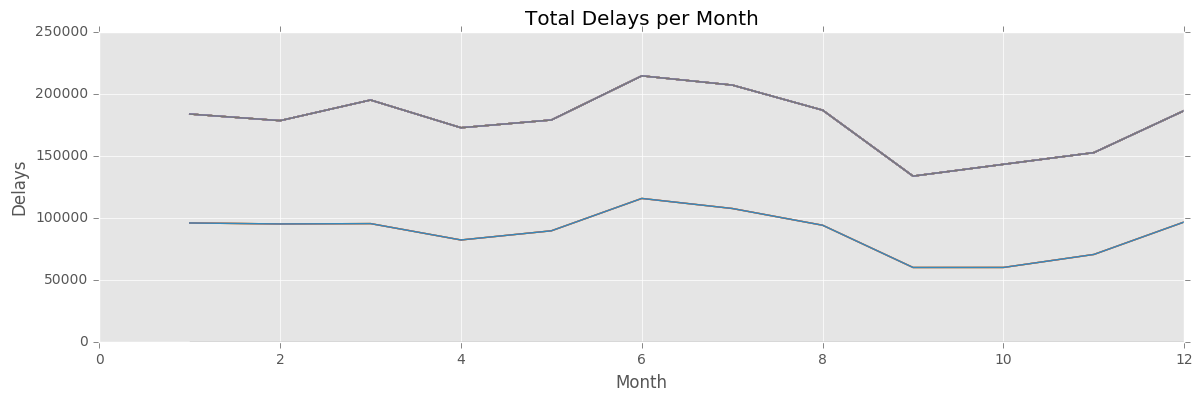

In [9]:
flights_delayed = flights[flights['TOTAL_DELAY'] > 0] # Filter using a boolean indexer 

matplotlib.style.use('ggplot') # Optional line
plt.figure(figsize=(14,4))
plt.plot(flights_delayed.groupby('MONTH').count()) # Group by COUNT, i.e. # number of flights each month that were delayed at all
plt.xlabel('Month', size = 12)
plt.ylabel('Delays', size = 12)
plt.title('Total Delays per Month')
#plt.show()   Show the graph (but if it's the last graph in a cell Jupyter automatically outputs it)

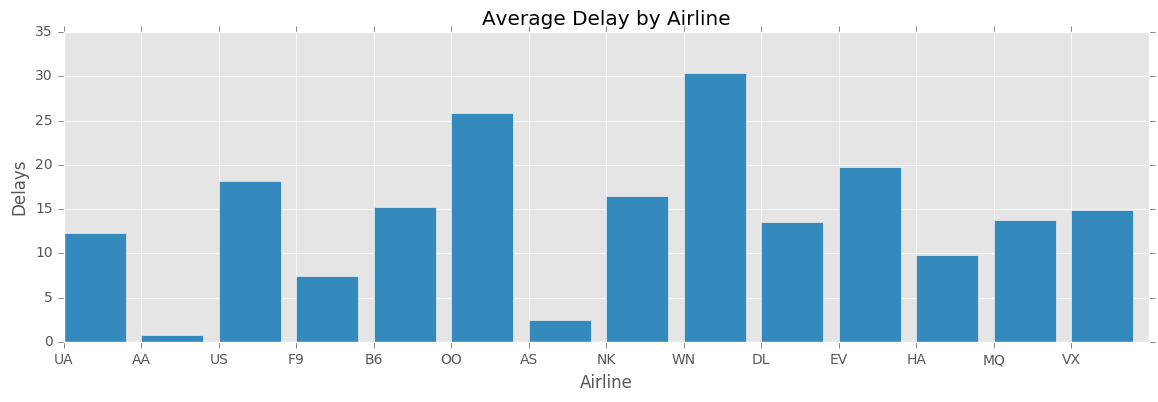

In [13]:
bins = np.arange(airlines.shape[0])

plt.figure(figsize=(14,4))
plt.bar(bins, avg_delay_airline['TOTAL_DELAY'].values)
plt.xlabel('Airline')
plt.xticks(bins, airlines['IATA_CODE'])
plt.ylabel('Delays')
plt.title('Average Delay by Airline')

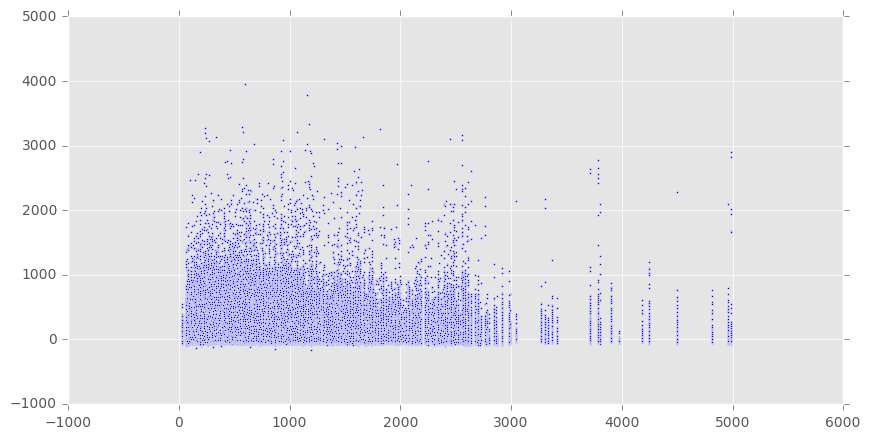

In [14]:
# Is delay time correlated with distance of the flight?
plt.figure(figsize=(10,5))
plt.scatter(flights['DISTANCE'], flights['TOTAL_DELAY'], s=3) # x= distance, y= delay

# Machine Learning

Let's say we want to make a few predictions on flight delays - how can we make reasonable judgements from the data we have?

## 1. Preprocessing and feature engineering

In [9]:
# View our data - pick out features you'd think would have some predictive power in determining flight delays
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,TOTAL_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,-33.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,-17.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,-14.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,-22.0


In [10]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'TOTAL_DELAY'],
      dtype='object')

## 2. Define inputs/outputs

In [28]:
target = ['DEPARTURE_DELAY']
featureColsNumeric = ['DISTANCE','DEPARTURE_TIME','AIR_TIME']

traintest = flights[target+featureColsNumeric].dropna()

### Sidebar:
Below is code for T-SNE, a very powerful visualization algorithm. Oftentimes datascientists use tools like this to see if there already exists a strong relationship between data-points based on a collection of variables. Here we try to see if flights are similar to other flights in their own airline.

In [8]:
from sklearn.manifold import TSNE

# visualize to 2 dimensional space, with perplexity 30
tsne = TSNE(n_components = 2, perplexity = 30)
X_embedded = tsne.fit_transform(traintest[featureColsNumeric][:1000])
X_embedded

array([[ 31.723043 , -19.772337 ],
       [ -5.1013484, -43.647717 ],
       [ -5.1744127, -43.460827 ],
       ...,
       [ 12.781296 ,   1.5512017],
       [-12.243685 ,  29.561977 ],
       [ 19.27742  ,  -1.982614 ]], dtype=float32)

In [24]:
airline_labels = list(set(flights['AIRLINE']))

In [17]:
cmap = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [38]:
from matplotlib.pyplot import cm

colors = cm.rainbow(np.linspace(0.0, 1.0, len(airline_labels)))

In [39]:
color_dict = {airline_labels[i]: colors[i] for i in range(len(airline_labels))}

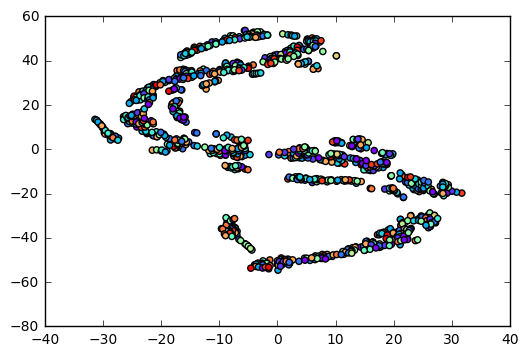

In [40]:
import seaborn as sns
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=flights['AIRLINE'][:1000].apply(lambda x: color_dict[x]))

## 3. Choose a model
The most basic model is a linear regression - the problem is reformulated as an optimization problem and the errors between the regression line and actual values are minimized. This is a nice model if your variables are all numeric and you can have several features.

See documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [34]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(traintest[featureColsNumeric], traintest[target])
linreg.score(traintest[featureColsNumeric], traintest[target])

0.030265158335749276

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(traintest[featureColsNumeric][:10000], traintest[target])
rf.score(traintest[featureColsNumeric], traintest[target])

C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\kenny\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7630408027487858

## 4. Evaluation

How can we make a better model?
- We have a lot of data in our dataset that we don't use because it's non-numeric. How do we interpret categorical variables?

## Feature engineering - encoding categorical data

- **One hot encoding** is one type of encoding scheme. 
- If you have a 'color' attribute that can be red, green, or blue, a row with 'red' is assigned the vector [1, 0, 0], and a row with blue is assigned [0, 0, 1].


Lets say we want to incorporate AIRLINEs into our predictions. But a lot of models don't understand the difference between 'AA' and 'AS'. We do some one-hot encoding here. There are tradeoffs to this: this introduces many more dimensions and can only boost our accuracy by a small amount. 

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [11]:
flights.groupby('AIRLINE')['TOTAL_DELAY'].mean()

AIRLINE
AA    12.277478
AS     0.742363
B6    18.120328
DL     7.500053
EV    15.200976
F9    25.808059
HA     2.493010
MQ    16.425060
NK    30.354900
OO    13.581735
UA    19.764650
US     9.787209
VX    13.731191
WN    14.892147
Name: TOTAL_DELAY, dtype: float64

In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
airlineLabels = le.fit_transform(flights['AIRLINE'])

enc = OneHotEncoder()
airlineOneHot = enc.fit_transform(airlineLabels.reshape(-1, 1))

In [24]:
airlineOneHot.shape

(5819079, 14)

In [39]:
airlineOneHot # sparse matrix is not a regular matrix

<5819079x14 sparse matrix of type '<class 'numpy.float64'>'
	with 5819079 stored elements in Compressed Sparse Row format>

In [37]:
airlinesEncoded = pd.DataFrame(airlineOneHot.toarray(), columns = list(le.classes_))

In [27]:
traintest.head()

,DEPARTURE_DELAY,DISTANCE,DEPARTURE_TIME,AIR_TIME
0,-11.0,1448,2354.0,169.0
1,-8.0,2330,2.0,263.0
2,-2.0,2296,18.0,266.0
3,-5.0,2342,15.0,258.0
4,-1.0,1448,24.0,199.0


In [41]:
# redefine input
target = ['DEPARTURE_DELAY']
featureColsNumeric = ['DISTANCE','DEPARTURE_TIME','AIR_TIME']

traintest = pd.concat((flights[target+featureColsNumeric], airlinesEncoded), axis=1).dropna()

Now we retrain our RF regressor and see if we can see any changes. Let's train on only 100000 rows for now, since it takes quite some time for the full dataset!

In [46]:
from sklearn.ensemble import RandomForestRegressor # only need this line once 

X = traintest.loc[:, traintest.columns!= target[0]][:100000]

rf = RandomForestRegressor()
rf.fit(X, traintest[target][:100000])
rf.score(X, traintest[target][:100000])

C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\kenny\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8403941628366974

### baseline ( our original features)

In [47]:
target = ['DEPARTURE_DELAY']
featureColsNumeric = ['DISTANCE','DEPARTURE_TIME','AIR_TIME']

traintest = flights[target+featureColsNumeric].dropna()

X = traintest.loc[:, traintest.columns!= target[0]][:100000]

rf = RandomForestRegressor()
rf.fit(X, traintest[target][:100000])
rf.score(X, traintest[target][:100000])

C:\Users\kenny\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.8288947664156675

Not too shabby!

# What other categorical variables can we encode? 
It seems like the departure/arrival airport can be quite important -i.e flights coming out of LaGuardia may be more delayed than flights coming out of Nashville International. 

1. How do we get numbers for average total delay by airport?
2. One-hot encode departure airports